In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [37]:
train=pd.read_csv('data/train.csv').drop('id',axis=1)
test=pd.read_csv('data/test.csv').drop('id',axis=1)
submission=pd.read_csv('data/submission.csv',index_col=0)

In [39]:
train_cpy=train.copy()
test_cpy=test.copy()
submission_cpy=submission.copy()

In [40]:
train.head()

,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


In [41]:
test.head()

,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,7,20.7,0.0,1.3,62.0,954.0,0.041,44.0,27.0
1,17,30.0,0.0,5.4,33.0,1590.0,0.061,49.0,36.0
2,13,19.0,1.0,2.1,95.0,193.0,0.020,36.0,28.0
3,6,22.5,0.0,2.5,60.0,1185.0,0.027,52.0,38.0
4,22,14.6,1.0,3.4,93.0,218.0,0.041,18.0,15.0


In [42]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   hour                    1459 non-null   int64  
 1   hour_bef_temperature    1457 non-null   float64
 2   hour_bef_precipitation  1457 non-null   float64
 3   hour_bef_windspeed      1450 non-null   float64
 4   hour_bef_humidity       1457 non-null   float64
 5   hour_bef_visibility     1457 non-null   float64
 6   hour_bef_ozone          1383 non-null   float64
 7   hour_bef_pm10           1369 non-null   float64
 8   hour_bef_pm2.5          1342 non-null   float64
 9   count                   1459 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 114.1 KB


In [43]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   hour                    715 non-null    int64  
 1   hour_bef_temperature    714 non-null    float64
 2   hour_bef_precipitation  714 non-null    float64
 3   hour_bef_windspeed      714 non-null    float64
 4   hour_bef_humidity       714 non-null    float64
 5   hour_bef_visibility     714 non-null    float64
 6   hour_bef_ozone          680 non-null    float64
 7   hour_bef_pm10           678 non-null    float64
 8   hour_bef_pm2.5          679 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 50.4 KB


In [65]:
train_cpy.nunique()

hour                       24
hour_bef_temperature      245
hour_bef_precipitation      2
hour_bef_windspeed         73
hour_bef_humidity          91
hour_bef_visibility       781
hour_bef_ozone             95
hour_bef_pm10             148
hour_bef_pm2.5             79
count                     314
dtype: int64

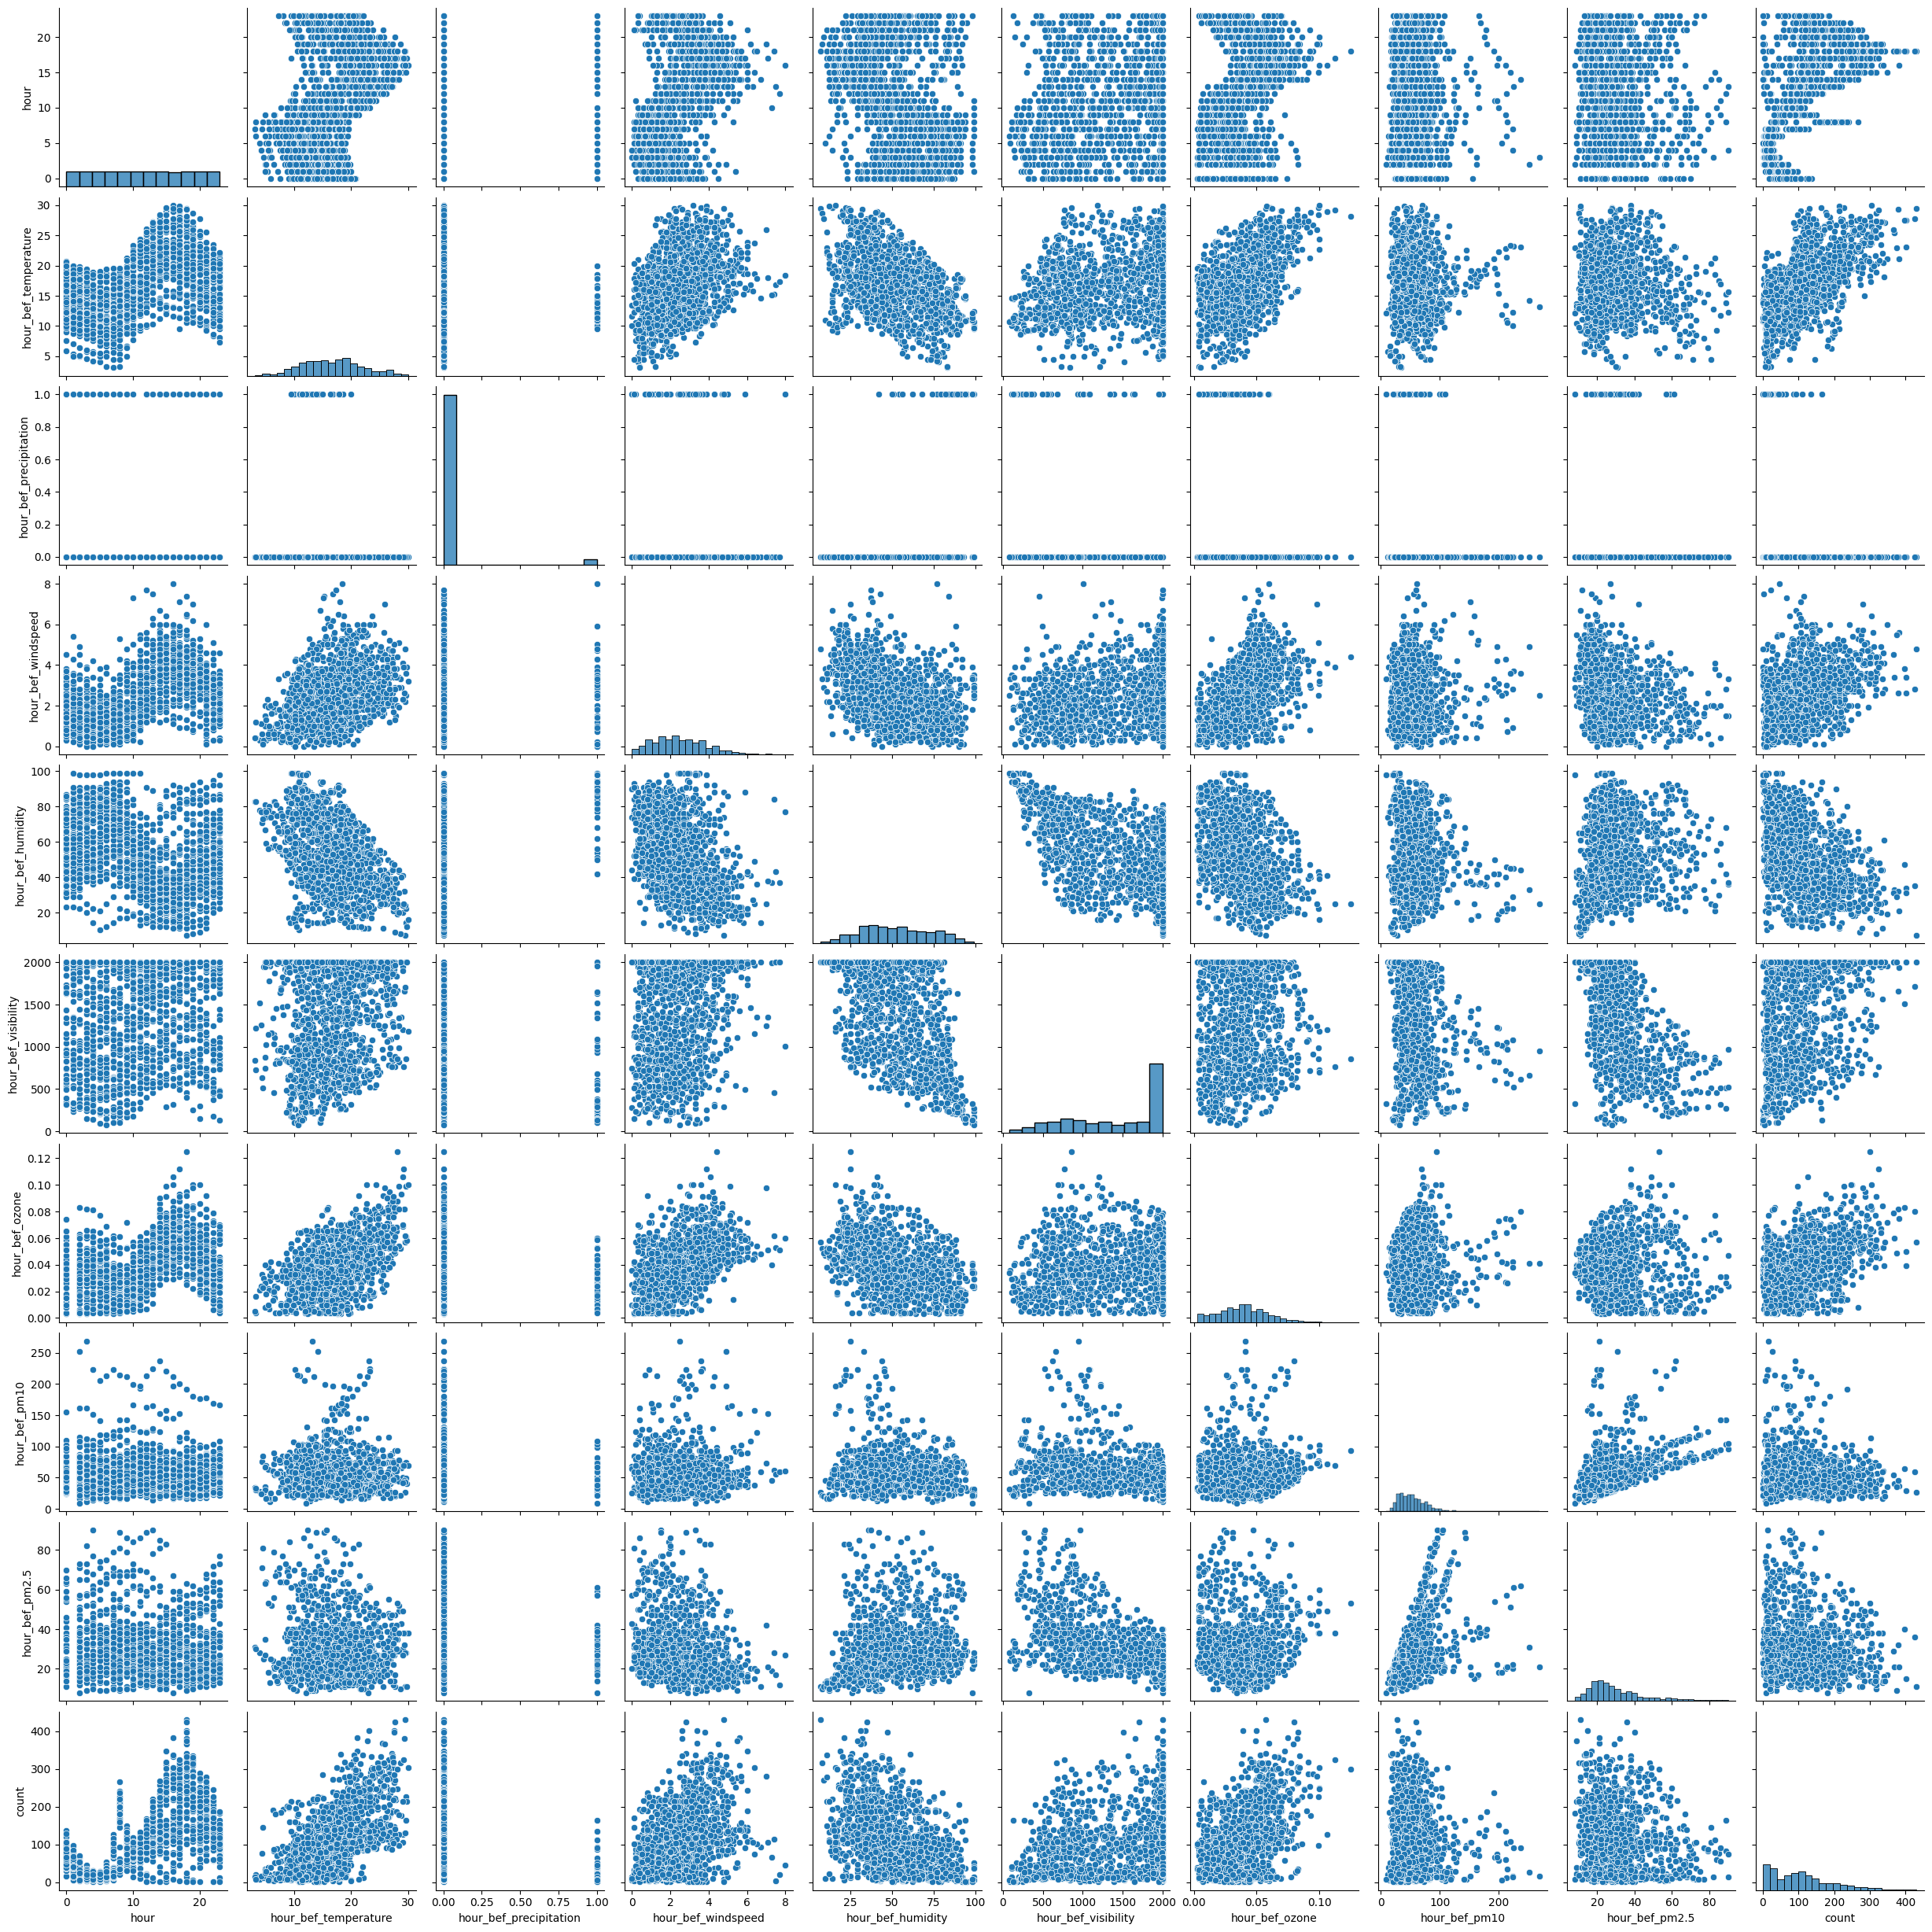

In [64]:
import seaborn as sns
sns.pairplot(train_cpy);

<AxesSubplot:>

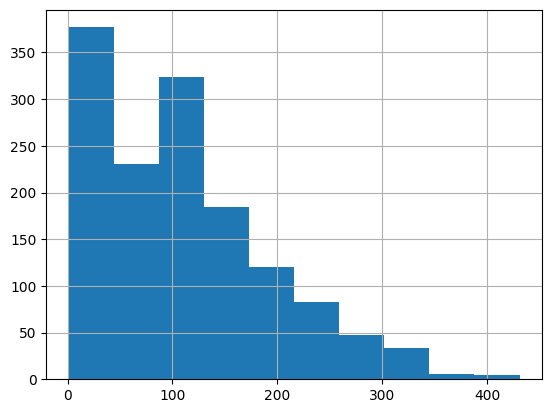

In [72]:
train_cpy[train_cpy['hour_bef_precipitation']==0]['count'].hist()

In [45]:
train_cpy.corr().style.background_gradient()

,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
hour,1.000000,0.407306,0.021646,0.462797,-0.329612,0.176491,0.390188,-0.035907,-0.061229,0.626047
hour_bef_temperature,0.407306,1.000000,-0.097056,0.375618,-0.496088,0.197417,0.541228,-0.003830,-0.078665,0.619404
hour_bef_precipitation,0.021646,-0.097056,1.000000,0.022746,0.276481,-0.217155,-0.062461,-0.051266,0.004742,-0.163985
hour_bef_windspeed,0.462797,0.375618,0.022746,1.000000,-0.433012,0.252092,0.520526,0.010176,-0.199113,0.459906
hour_bef_humidity,-0.329612,-0.496088,0.276481,-0.433012,1.000000,-0.592244,-0.421047,-0.108106,0.167736,-0.471142
hour_bef_visibility,0.176491,0.197417,-0.217155,0.252092,-0.592244,1.000000,0.101899,-0.403277,-0.644989,0.299094
hour_bef_ozone,0.390188,0.541228,-0.062461,0.520526,-0.421047,0.101899,1.000000,0.113015,0.017313,0.477614
hour_bef_pm10,-0.035907,-0.003830,-0.051266,0.010176,-0.108106,-0.403277,0.113015,1.000000,0.489558,-0.114288
hour_bef_pm2.5,-0.061229,-0.078665,0.004742,-0.199113,0.167736,-0.644989,0.017313,0.489558,1.000000,-0.134293
count,0.626047,0.619404,-0.163985,0.459906,-0.471142,0.299094,0.477614,-0.114288,-0.134293,1.000000


<AxesSubplot:>

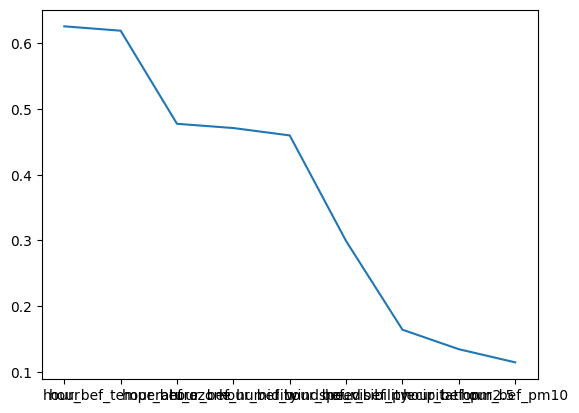

In [46]:
abs(train.corr()['count']).sort_values(ascending=False)[1:].plot()

(array([  4.,  12.,  20.,  18.,  43.,  44.,  34.,  75.,  72.,  80.,  75.,
         73.,  72.,  72.,  74., 103.,  57.,  55.,  54.,  55.,  59.,  48.,
         60.,  53.,  36.,  42.,  24.,  24.,   7.,  12.]),
 array([ 7.        , 10.06666667, 13.13333333, 16.2       , 19.26666667,
        22.33333333, 25.4       , 28.46666667, 31.53333333, 34.6       ,
        37.66666667, 40.73333333, 43.8       , 46.86666667, 49.93333333,
        53.        , 56.06666667, 59.13333333, 62.2       , 65.26666667,
        68.33333333, 71.4       , 74.46666667, 77.53333333, 80.6       ,
        83.66666667, 86.73333333, 89.8       , 92.86666667, 95.93333333,
        99.        ]),
 <BarContainer object of 30 artists>)

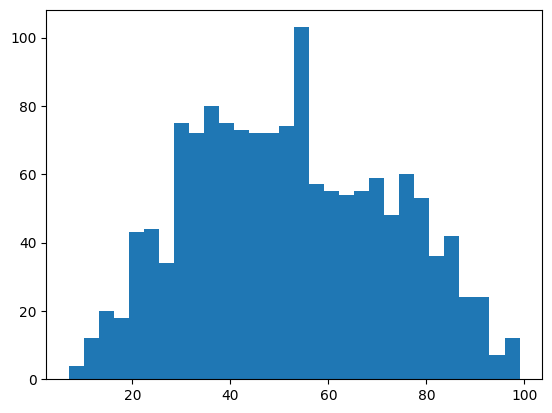

In [47]:
plt.hist(train['hour_bef_humidity'],bins=30)

In [79]:
train_cpy.isnull().sum()

hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [83]:
train_cpy.isnull().sum()/len(train)*100

hour                      0.000000
hour_bef_temperature      0.137080
hour_bef_precipitation    0.137080
hour_bef_windspeed        0.616861
hour_bef_humidity         0.137080
hour_bef_visibility       0.137080
hour_bef_ozone            5.209047
hour_bef_pm10             6.168609
hour_bef_pm2.5            8.019191
count                     0.000000
dtype: float64

In [80]:
median=train.median()
train_fil=train_cpy.fillna(median,inplace=False)
train_fil.isnull().sum()

hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
count                     0
dtype: int64

In [84]:
train_set,valid_set=train_test_split(train_fil,test_size=.2,random_state=47)

In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

lin_reg=LinearRegression()
rf_reg=RandomForestRegressor(n_estimators=500)

In [86]:
X_train=train_set.drop(['count'],axis=1)
y_train=train_set['count']
X_valid=valid_set.drop(['count'],axis=1)
y_valid=valid_set['count']

In [53]:
def get_model_score(model,X_train,y_train,X_val,y_val):
    pred_tr_arr=cross_val_score(model,X_train,y_train,scoring='neg_mean_squared_error',cv=5)
    pred_val_arr=cross_val_score(model,X_val,y_val,scoring='neg_mean_squared_error',cv=5)
    print('train set RMSE : {}'.format(np.round(np.sqrt(np.mean(-1*pred_tr_arr)),2)))
    print('valid set RMSE : {}'.format(np.round(np.sqrt(np.mean(-1*pred_val_arr)),2)))

In [54]:
from sklearn.model_selection import cross_val_score

get_model_score(lin_reg,X_train,y_train,X_valid,y_valid)

train set RMSE : 52.9
valid set RMSE : 52.72


In [55]:
get_model_score(rf_reg,X_train,y_train,X_valid,y_valid)

train set RMSE : 39.45
valid set RMSE : 43.59


In [73]:
rf_reg=RandomForestRegressor(n_estimators=1000)
get_model_score(rf_reg,X_train,y_train,X_valid,y_valid)

train set RMSE : 39.41
valid set RMSE : 43.49


### check feature importance

In [89]:
rf_reg.fit(X_train,y_train)
ftr_importances_values=rf_reg.feature_importances_
ftr_importances=pd.Series(ftr_importances_values,index=X_train.columns)
sorted_ftr_imp=ftr_importances.sort_values(ascending=False)

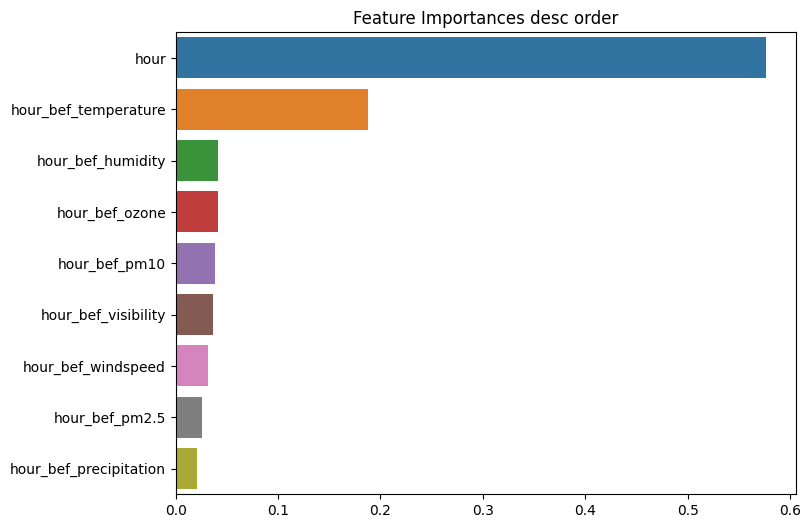

In [90]:
import seaborn as sns

plt.figure(figsize=(8,6))
plt.title('Feature Importances desc order')
sns.barplot(x=sorted_ftr_imp,y=sorted_ftr_imp.index)
plt.show()

c:\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


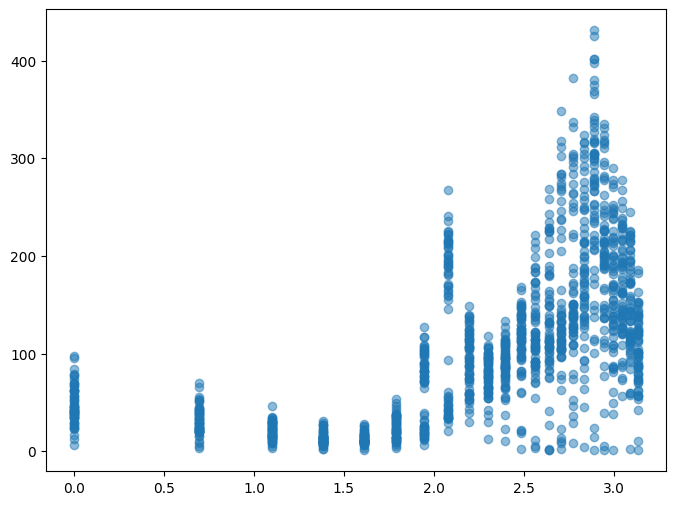

In [96]:
plt.figure(figsize=(8,6))
plt.scatter(x=np.log(train_fil['hour']),y=train_fil['count'],alpha=.5,)

In [74]:
X_train_full=train.drop('count',axis=1)
y_train_full=train['count']
rf_reg.fit(X_train_full,y_train_full)

RandomForestRegressor(n_estimators=1000)

In [75]:
test_cpy.fillna(median,inplace=True)

In [76]:
pred=rf_reg.predict(test)

In [77]:
submission_cpy['count']=pred
submission_cpy

,count
id,
0,98.448
1,215.188
2,77.213
4,30.748
5,71.245
...,...
2148,58.754
2149,71.644
2165,122.588


In [78]:
submission_cpy.to_csv('jan04-2sub.csv')